## Importing libraries

In [19]:
from rfm import *
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits import mplot3d 
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
df = pd.read_csv('dataset/Online Retail.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/11 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [7]:
# Dictionary for the column names
col_dict = {"customer_id": 'CustomerID',
            "invoice_date": 'InvoiceDate',
            "invoice_id" : 'InvoiceNo',
            "cost": 'TotalPrice'}

## Clustering using RFM Metrics

In [8]:
# RFM() takes three arguments: (dataframe, dictionary_column_names, reference_date)
rfm = RFM(df, col_dict, reference_date='DAYAFTER')
rfm

In [9]:
# Access the RFM df using .rfm_df attribute
rfm.rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


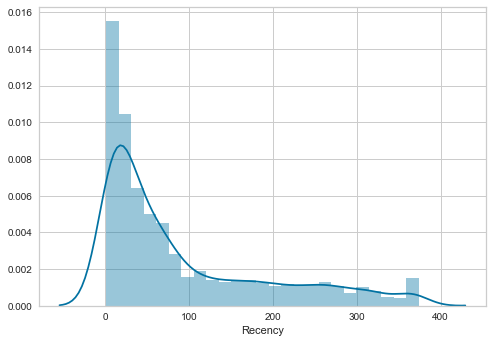

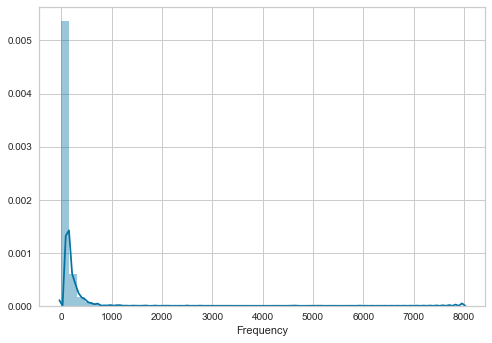

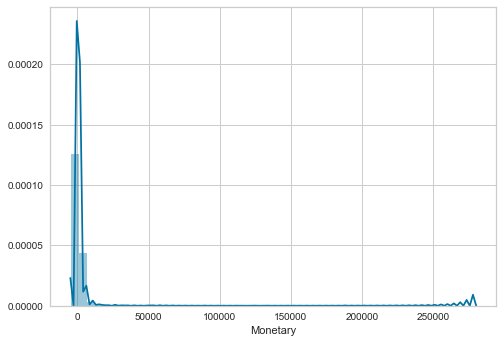

In [10]:
# Checking the distribution of each RFM metric
rfm.plot()

In [11]:
# You can use .apply_score() method to get the quartile rank of each customer based on RFM metrics
rfm.apply_score()

,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_total,rfm_sum
CustomerID,,,,,,,,
12346.0,326,2,0.00,4,4,4,444,12
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,19,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,4,4,4,444,12
18281.0,181,7,80.82,4,4,4,444,12
18282.0,8,13,176.60,1,4,4,144,9


Using the elbow method, the optimal number of k: 5


,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_total,rfm_sum,clusters
CustomerID,,,,,,,,,
12346.0,326,2,0.00,4,4,4,444,12,0
12347.0,2,182,4310.00,1,1,1,111,3,1
12348.0,75,31,1797.24,3,3,1,331,7,1
12349.0,19,73,1757.55,2,2,1,221,5,1
12350.0,310,17,334.40,4,4,3,443,11,0
...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,4,4,4,444,12,0
18281.0,181,7,80.82,4,4,4,444,12,0
18282.0,8,13,176.60,1,4,4,144,9,1


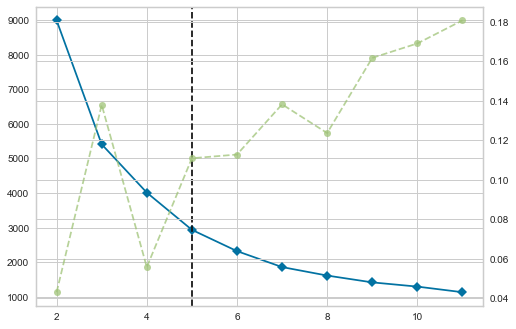

In [12]:
# .cluster() will run KMeans clustering for you while using Elbow Method to get the optimal k.
rfm.cluster()

In [13]:
cluster_df = rfm.cluster()
# Disable showing of KElbow Plot
plt.close()

Using the elbow method, the optimal number of k: 5


In [14]:
# .cluster_summary() gives you the mean/average of each RFM metric for each cluster
rfm.cluster_summary()

Recency    Frequency       Monetary      
                mean         mean           mean count
clusters                                              
0         249.581157    27.672575     466.381997  1072
1          43.227541    74.584918    1299.610968  3050
2           9.000000  1013.400000  192103.854000     5
3           2.000000  5914.000000   64776.602500     4
4          12.373444   501.896266   10857.531867   241

## Plotting the clusters

In [15]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(cluster_df.loc[:,['Recency', 'Frequency', 'Monetary']])

In [16]:
scaled_values_df = pd.DataFrame(scaled_values, index=cluster_df.index, columns=['Recency', 'Frequency','Monetary'])

In [17]:
scaled_values_df['clusters'] = cluster_df['clusters']

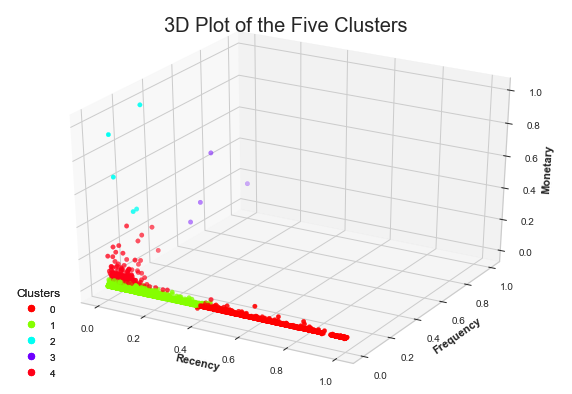

In [18]:
# Creating figure 
fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d") 

x = scaled_values_df['Recency']
y = scaled_values_df['Frequency']
z = scaled_values_df['Monetary']
  
# Creating plot
sctt = ax.scatter3D(x, y, z, 
                    c = scaled_values_df['clusters'],  
                    cmap = plt.get_cmap('hsv', scaled_values_df['clusters'].nunique())
                   )
plt.title("3D Plot of the Five Clusters", fontsize=20) 
ax.set_xlabel('Recency', fontweight ='bold')  
ax.set_ylabel('Frequency', fontweight ='bold')  
ax.set_zlabel('Monetary', fontweight ='bold') 
legend1 = ax.legend(*sctt.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)
  
# show plot 
plt.show() 

## Interpretations

- **Cluster 0** : Biggest cluster, perhaps these are the new customers given that their recency is decent, but their frequency is still building up. 
- **Cluster 1** : Worst cluster, these are customers who've churned out already
- **Cluster 2** : Best cluster, these are our Champions or "Can't lose them" customers. These are the ones with high frequency and are active buyers.
- **Cluster 3** : Big-time buyers cluster. It's somewhat the same with Cluster 2, but the main difference is the average monetary value of the purchases from these customers.
- **Cluster 4** : High-potential cluster. These are customers that are recently active in purchasing, but need to grow their frequency. 